<h1 style="font-size: 80px; color: blue"> 
Olivia Finder - Github Repository Transitive dependencies
</h1>


## 0 - Previous requirements

### Setup venv and install requirements

In [ ]:
# Olivia Finder requirements
%pip install -r requirements.txt

### Setup library path

In [2]:
# Append the path to the olivia_finder package
import sys
sys.path.append('../../olivia_finder/')

### Setup configuration

In [3]:
# Add the environment variable OLIVIA_FINDER_CONFIG_FILE_PATH
import os
os.environ['OLIVIA_FINDER_CONFIG_FILE_PATH'] = "../../olivia_finder/config.ini"

## Raw data

**Build the DataSource object**

In [4]:
from olivia_finder.data_source.repository_scrapers.github import GithubScraper
scraper = GithubScraper()

With the datasource we can obtain the repository dependencies:

Specifically we obtain a dictionary of dictionaries with the requested package data

In [5]:
# Get the package data from data source
scraper.obtain_package_data("dab0012/olivia-finder")

{'name': 'dab0012/olivia-finder',
 'version': '',
 'url': 'https://github.com/dab0012/olivia-finder',
 'dependencies': [{'name': 'inveniosoftware-contrib/intbitset',
   'version': '2.4.0',
   'url': 'https://github.com/inveniosoftware-contrib/intbitset'},
  {'name': 'matplotlib/matplotlib',
   'version': '',
   'url': 'https://github.com/matplotlib/matplotlib'},
  {'name': 'networkx/networkx',
   'version': '',
   'url': 'https://github.com/networkx/networkx'},
  {'name': 'numpy/numpy',
   'version': '1.18.5',
   'url': 'https://github.com/numpy/numpy'},
  {'name': 'pandas-dev/pandas',
   'version': '',
   'url': 'https://github.com/pandas-dev/pandas'},
  {'name': 'getanewsletter/BeautifulSoup4',
   'version': '',
   'url': 'https://github.com/getanewsletter/BeautifulSoup4'},
  {'name': 'pybraries/pybraries',
   'version': '',
   'url': 'https://github.com/pybraries/pybraries'},
  {'name': 'psf/requests',
   'version': '',
   'url': 'https://github.com/psf/requests'},
  {'name': 'Selen

The same process but with another package

In [6]:
# Get the package data from data source
scraper.obtain_package_data("pallets/flask")

{'name': 'pallets/flask',
 'version': '',
 'url': 'https://github.com/pallets/flask',
 'dependencies': [{'name': 'pallets/flask',
   'version': '2.3.2',
   'url': 'https://github.com/pallets/flask'},
  {'name': 'pytest-dev/pytest',
   'version': '7.3.1',
   'url': 'https://github.com/pytest-dev/pytest'},
  {'name': 'pypa/build',
   'version': '0.10.0',
   'url': 'https://github.com/pypa/build'},
  {'name': 'miku/cachetools',
   'version': '5.3.1',
   'url': 'https://github.com/miku/cachetools'},
  {'name': 'asottile/cfgv',
   'version': '3.3.1',
   'url': 'https://github.com/asottile/cfgv'},
  {'name': 'dcramer/chardet',
   'version': '5.1.0',
   'url': 'https://github.com/dcramer/chardet'},
  {'name': 'pallets/click',
   'version': '8.1.3',
   'url': 'https://github.com/pallets/click'},
  {'name': 'tartley/colorama',
   'version': '0.4.6',
   'url': 'https://github.com/tartley/colorama'},
  {'name': 'pallets/flask/blob/main/requirements/dev.txt',
   'version': 'pyproject-hooks',
   'u

## Network data

The data acquisition could be fulfilled using the data source, yet the Package Manager class provides additional functionalities that are valuable when performing data collection and exporting tasks.

**Build the PackageManager object**

In [8]:
# Import the package manager module
from olivia_finder.package_manager import PackageManager

# Create a package manager instance using the GithubScraper data source implementation
github_pm = PackageManager(
    data_sources = [GithubScraper()]
)

**Fetch a package**

In [10]:
# Get the package data from package manager
github_pm.fetch_package("dab0012/olivia-finder").to_dict()

{'name': 'dab0012/olivia-finder',
 'version': '',
 'url': 'https://github.com/dab0012/olivia-finder',
 'dependencies': [{'name': 'inveniosoftware-contrib/intbitset',
   'version': '2.4.0',
   'url': None,
   'dependencies': []},
  {'name': 'matplotlib/matplotlib',
   'version': '',
   'url': None,
   'dependencies': []},
  {'name': 'networkx/networkx',
   'version': '',
   'url': None,
   'dependencies': []},
  {'name': 'numpy/numpy',
   'version': '1.18.5',
   'url': None,
   'dependencies': []},
  {'name': 'pandas-dev/pandas',
   'version': '',
   'url': None,
   'dependencies': []},
  {'name': 'getanewsletter/BeautifulSoup4',
   'version': '',
   'url': None,
   'dependencies': []},
  {'name': 'pybraries/pybraries',
   'version': '',
   'url': None,
   'dependencies': []},
  {'name': 'psf/requests', 'version': '', 'url': None, 'dependencies': []},
  {'name': 'SeleniumHQ/selenium',
   'version': '',
   'url': None,
   'dependencies': []},
  {'name': 'tqdm/tqdm', 'version': '', 'url':

**Build a dependency netowrk**

In [11]:
# Build the dependency network for the package
olivia_finder_dependency_network = github_pm.get_dependency_network(
    "dab0012/olivia-finder",
    deep_level = 2,
    generate = True
)

We define some functions to represent the data

In [74]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_degree_distribution(G, title):
    '''
    Plot the degree distribution of a networkx graph
    '''

    # Nodes' degree vector
    degree=[x[1] for x in G.degree()]
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Linear plot
    axs[0].plot(degree, color='r', marker='o', linestyle='None')
    axs[0].set_title(title)
    axs[0].set_xlabel('Degree')
    axs[0].set_ylabel('Number of nodes')
    axs[0].set_yscale('log')
    axs[0].set_xscale('log')

    
    # Plot histogram with log scale
    axs[1].hist(degree, bins=100, color='r')
    axs[1].set_title(title)
    axs[1].set_xlabel('Degree')
    axs[1].set_ylabel('Number of nodes')
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    
    plt.show()

def draw_networkx_graph(G, layout='circular', size=(20,20), labels=True):
    '''
    Draw a networkx graph
    '''

    layouts = {
        'circular': nx.circular_layout,
        'kamada_kawai': nx.kamada_kawai_layout,
        'random': nx.random_layout,
        'shell': nx.shell_layout,
        'spring': nx.spring_layout,
    }
    plt.figure(figsize=size)
    pos = layouts[layout](G)
    node_size = [G.in_degree(node) * 80 for node in G]
    node_color = [G.in_degree(node) for node in G]
    node_opacity = 0.8
    edge_color = 'black'
    edge_opacity = 0.3

    width = 1

    nx.draw_networkx_nodes(
        G,
        pos,
        node_size=node_size,
        node_color=node_color,
        alpha=node_opacity
    )

    nx.draw_networkx_edges(
        G,
        pos,
        edge_color=edge_color,
        alpha=edge_opacity,
        width=width
    )
    
    # Agregar etiquetas personalizadas
    if labels:
        nx.draw_networkx_labels(G, pos, font_size=8)

    plt.gca().set_aspect('equal')
    plt.axis('off')
    plt.show()


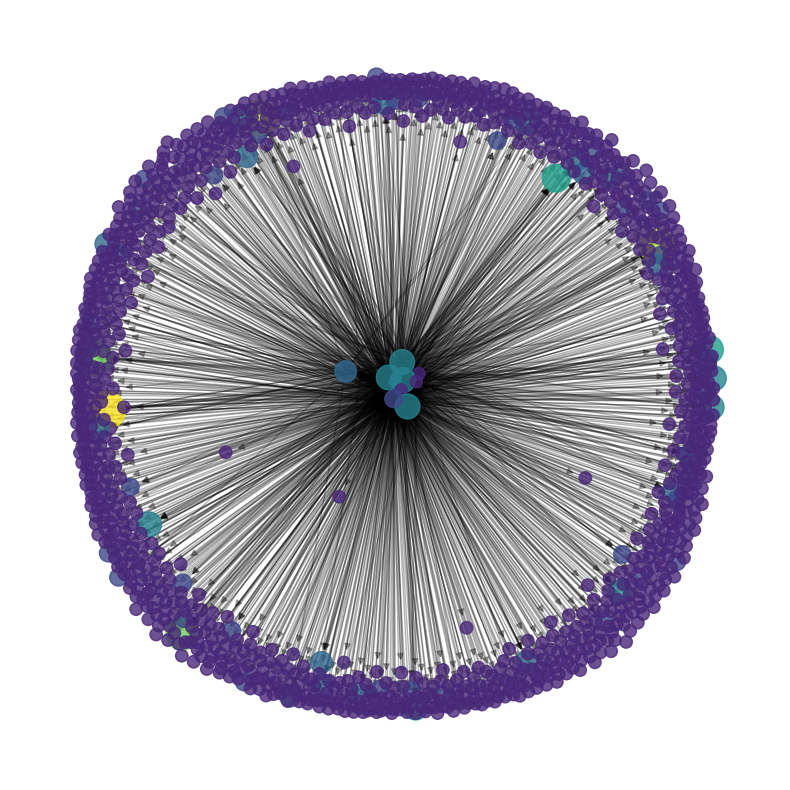

In [76]:
draw_networkx_graph(olivia_finder_dependency_network, layout='spring', size=(10,10), labels=False)

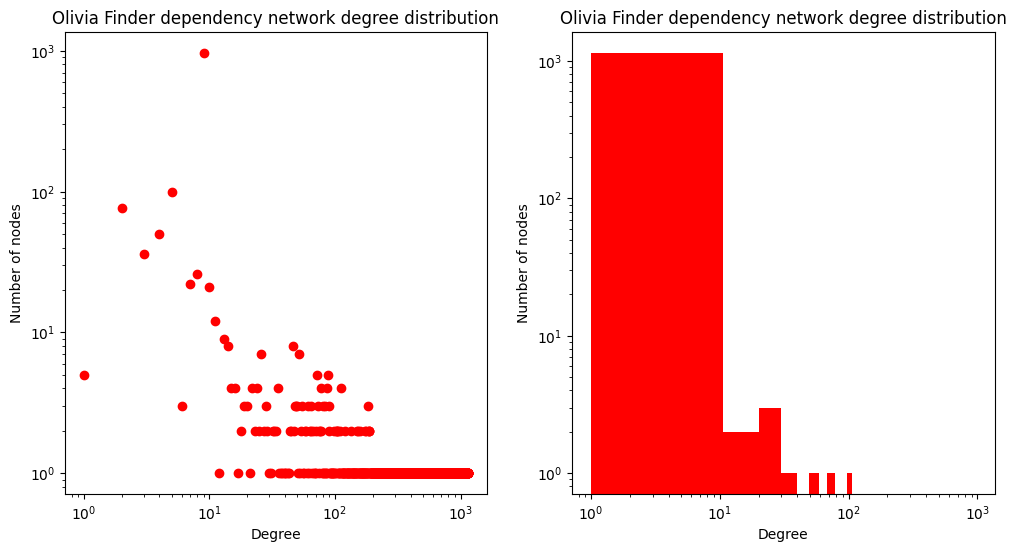

In [24]:
plot_degree_distribution(olivia_finder_dependency_network, "Olivia Finder dependency network degree distribution")

In [34]:
# Show degrees of the dependency network as a pandas dataframe
import pandas as pd

degres = pd.DataFrame(olivia_finder_dependency_network.degree(), columns=['package', 'degree'])
degres.sort_values(by='degree', ascending=False).head(10)

print("Number of nodes: {}".format(olivia_finder_dependency_network.number_of_nodes()))
print("Number of edges: {}".format(olivia_finder_dependency_network.number_of_edges()))
display(degres.describe())
display(degres.sort_values(by='degree', ascending=False).head(10))


Number of nodes: 1149
Number of edges: 1297


,degree
count,1149.000000
mean,2.257615
std,28.685513
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,963.000000


,package,degree
9,SeleniumHQ/selenium,963
5,pandas-dev/pandas,99
2,matplotlib/matplotlib,76
4,numpy/numpy,50
3,networkx/networkx,36
8,psf/requests,26
7,pybraries/pybraries,22
10,tqdm/tqdm,21
11,python/typing,12
0,dab0012/olivia-finder,12


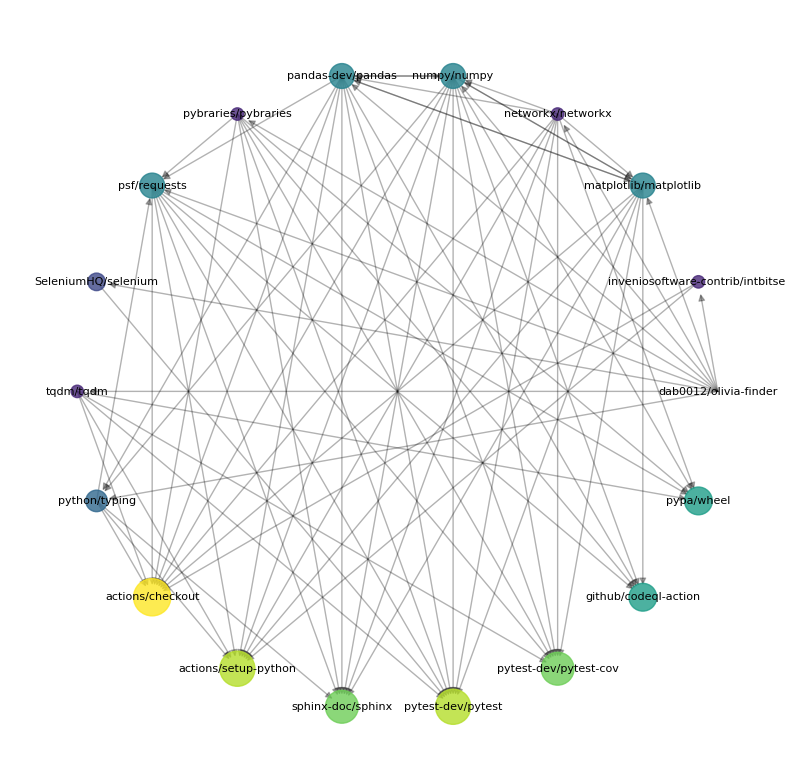

In [77]:
# Remove nodes with degree < 5
olivia_finder_dependency_network_filtered = olivia_finder_dependency_network.copy()
for node in olivia_finder_dependency_network.nodes():
    if olivia_finder_dependency_network.degree(node) < 5:
        olivia_finder_dependency_network_filtered.remove_node(node)

draw_networkx_graph(olivia_finder_dependency_network_filtered, layout='shell', size=(10,10))

In [58]:
flask_dependency_network = github_pm.get_dependency_network(
    "pallets/flask",
    deep_level = 2,
    generate = True
)

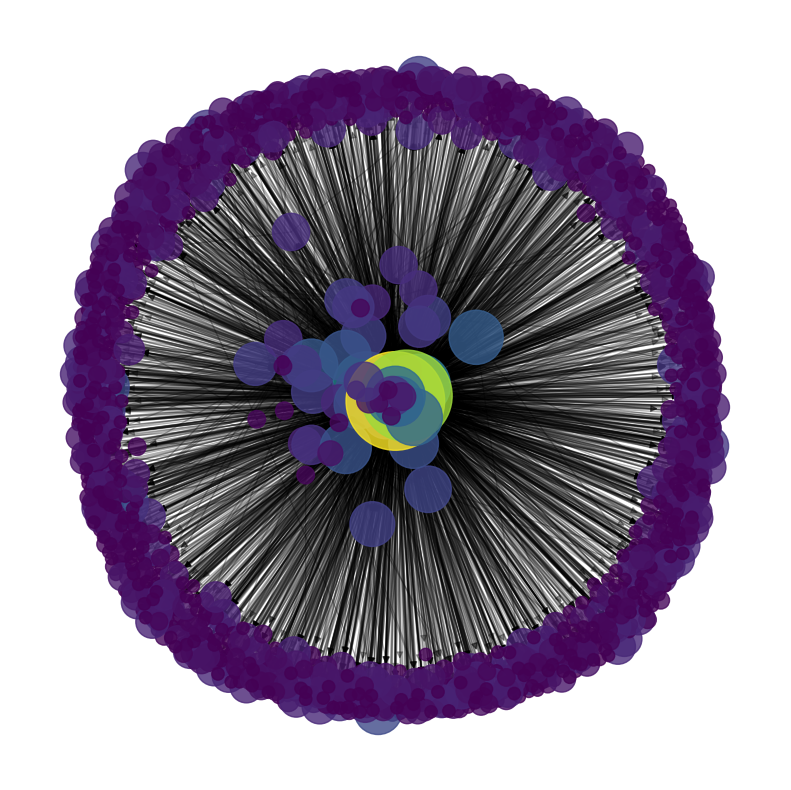

In [78]:
draw_networkx_graph(flask_dependency_network, layout='spring', size=(10,10), labels=False)

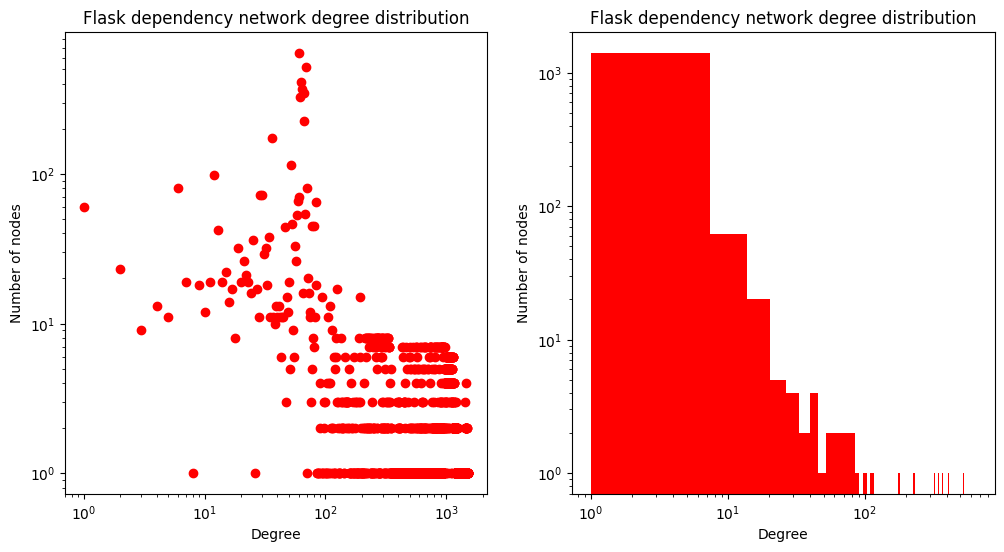

In [51]:
plot_degree_distribution(flask_dependency_network, "Flask dependency network degree distribution")

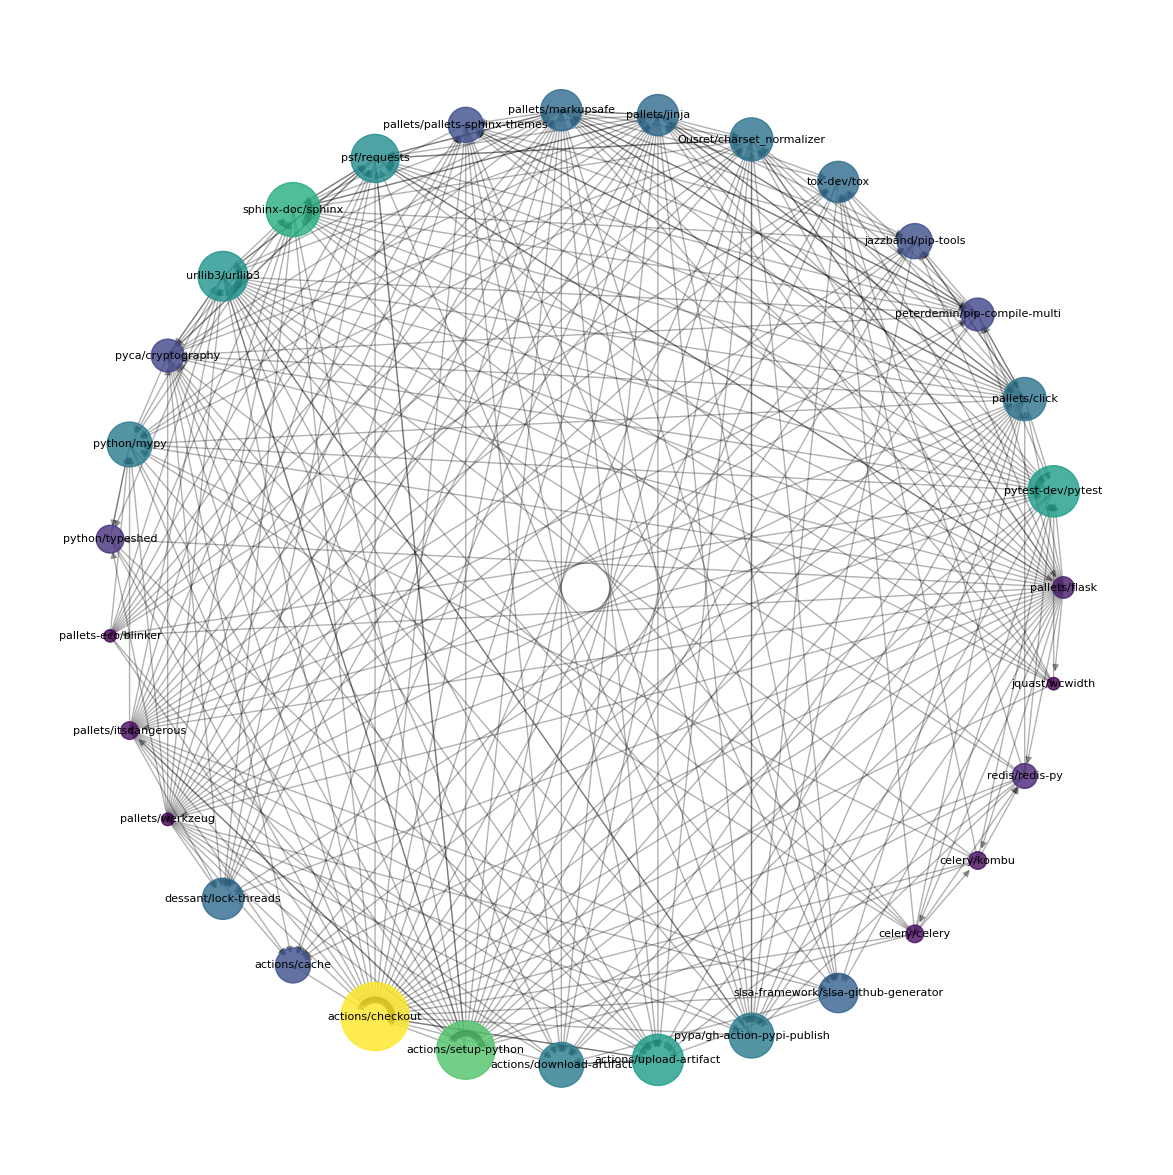

In [81]:
# Remove nodes with degree < 20

flask_dependency_network_filtered = flask_dependency_network.copy()
for node in flask_dependency_network.nodes():
    if flask_dependency_network.degree(node) < 30:
        flask_dependency_network_filtered.remove_node(node)

draw_networkx_graph(flask_dependency_network_filtered, layout="circular", size=(15,15))